# <div align="center">**Table of Contents**
1. [<span style="color:green">**About This Dataset**](#1)<br>
2. [<span style="color:green">**Import Libraries**](#2)<br>
3. [<span style="color:green">**Data Analysis**](#3)<br>
4. [<span style="color:green">**Data Preparation**](#4)<br> 
5. [<span style="color:green">**Model**](#5)<br> 
6. [<span style="color:green">**Test Data**](#6)<br> 
7. [<span style="color:green">**Summary**](#6)<br> 

# <span style="color:green"><div align="center">**About This Dataset** <a  name="1"></a>

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### **Overview** <br>
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like. <br> 

### **Data Dictionary** <br>

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |



### **Variable Notes** <br> 
pclass: A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br> 
3rd = Lower <br>

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored) <br>

parch: The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them.


Source: https://www.kaggle.com/c/titanic/overview

# <span style="color:green"><div align="center">**Import Libraries** <a  name="2"></a>

In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE

from utils import *

%matplotlib inline
np.random.seed(1)

# <span style="color:green"><div align="center">**Data Analysis** <a  name="3"></a>

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

print(f'train data shape: {df_train.shape}')
print(f'test data shape: {df_test.shape}')

train data shape: (891, 12)
test data shape: (418, 11)


#### <span style="color:green">Let us first review the general information of the data 

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### <span style="color:blue"> As we can see some of the data types are not numeric so we need to convert them, <br> also maybe we don't use some features for example PassengerID 

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### <span style="color:blue"> At first glance we would probably need to normalize Age and Fare

#### <span style="color:green">Check null values 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


#### <span style="color:blue"> We can see that most of the features don't have many null values but in case of Cabin almost are missing so maybe we can drop them <br> in case of Age we can fill them with some tecniques for example average <br> also we have 2 missing rows in embarked and one in the Fare but we can drop them because they are too few

#### <span style="color:green"> See if we have imbalanced data 

/home/raphael/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


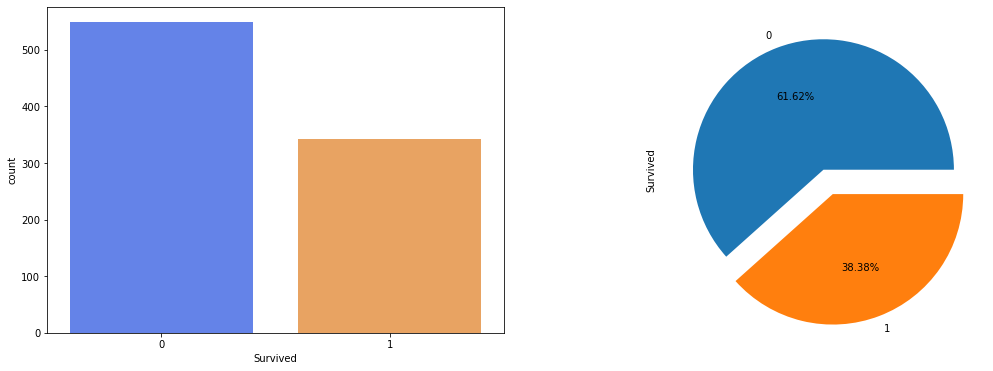

In [7]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(df_train['Survived'], ax=ax[0], palette = 'bright', alpha=0.7)

count = df_train['Survived'].value_counts(normalize=True)
count.plot.pie(autopct="%.2f%%", explode = [0,0.2], ax=ax[1])
plt.show()

#### <span style="color:blue"> As we saw above target variable is imbalance so we will use SMOTE to solve this problem <br> SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. <br> Hence making the minority class equal to the majority class. < br> SMOTE does this by selecting similar records and altering that record one column <br> at a time by a random amount within the difference to the neighbouring records.

#### <span style="color:green"> We should also see all categorical features distribution

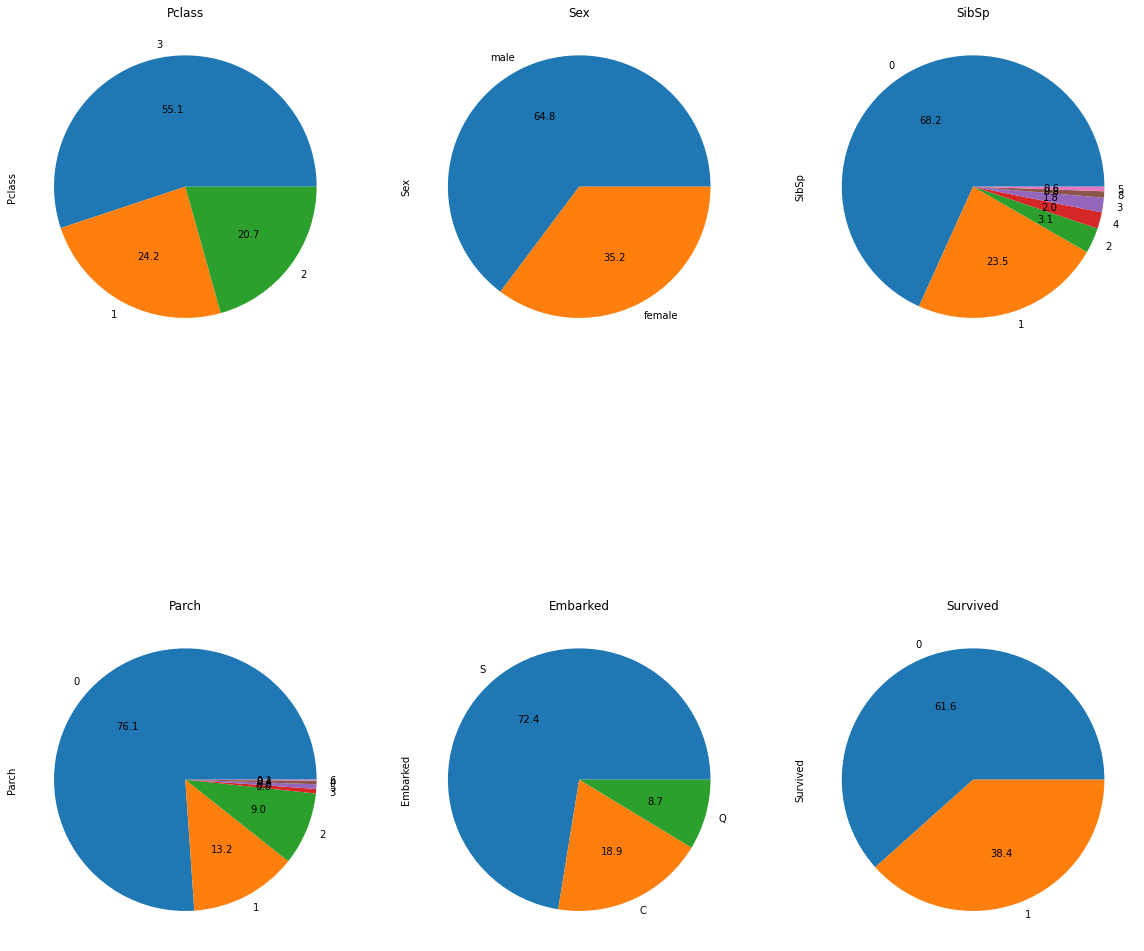

In [8]:
plot_categorical(df_train, Pclass="Pclass", Sex="Sex", SibSp="SibSp", Parch="Parch", Embarked="Embarked", Survived="Survived")

#### <span style="color:blue"> This drawing gives us a good result to see the concentration of each feature <br> for example as you can see the 3rd class tickets are more than the first and second probably due to the price. <br> Also the number of men on board is greater it's is probably difficult to say a specific reason for this <br> it's also noticeable that most of the people are alone on the board

#### <span style="color:green"> For categorical features we can also do some bivariate analysis maybe it will help us to get intuitive knowledge of each feature

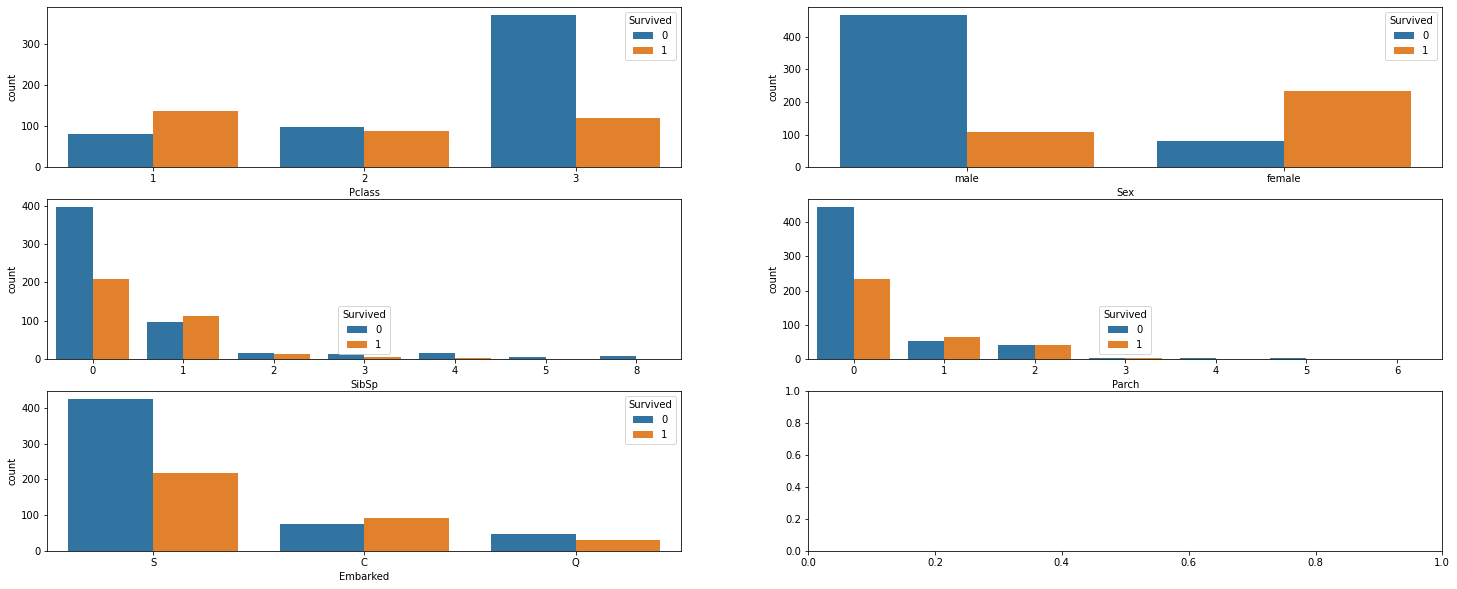

In [9]:
cat_with_output(df_train, Pclass="Pclass", Sex="Sex", SibSp="SibSp", Parch="Parch", Embarked="Embarked")

#### <span style="color:blue">  
- We can see some logical results here. As you can see if we compare the number of survivors according to the classes, <br> the least number of deaths in the first class compared to the second, while the highest number of deaths in the 3rd class. <br> probably firstly they give the boat for the first class passengers <br> 
- We also see that more men died than women, presumably because first women and children were put in the boat

#### <span style="color:green"> Maybe some other kind of plots will be more helpful because lines are more noticeable for human

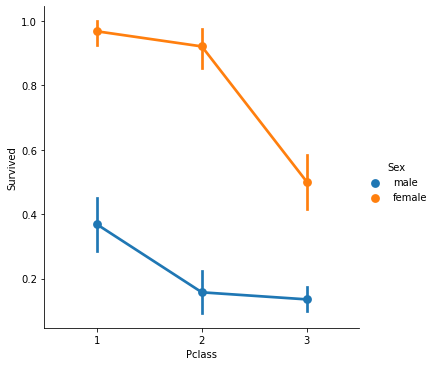

In [10]:
sns.catplot(x="Pclass", y = "Survived", kind = "point", data=df_train, hue="Sex")

#### <span style="color:blue"> This drawing shows the better difference between the survivals <br> As you can see, women survived more than men and also the graph decreases <br> which means that more survived from the first class than the third for example

#### <span style="color:green"> We should also see correlation matrix which is one of the best way to detect feature dependance <br> there we don't have all features because some of them was not numeric but we convert and plot it again in next cells

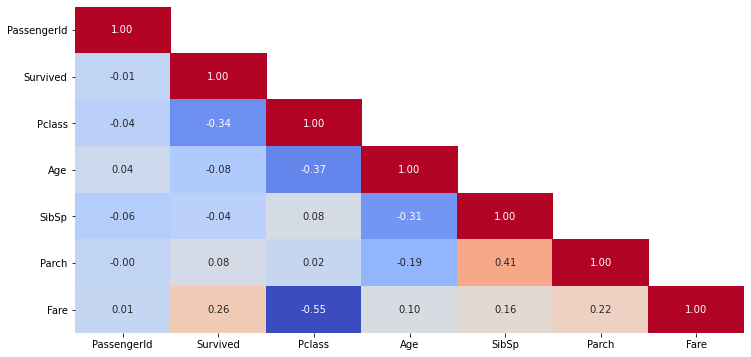

In [11]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix, mask=np.triu(matrix,1), annot=True,fmt=".2f", vmax=.8, cbar=False, cmap="coolwarm");

#### <span style="color:blue"> correlation plot shows that the most correlated features for now is Pclass and Fare which is logical. <br> passegnegrs who paid more for the ticket bought a better class ticket also. <br> if we check survived feature, the most correlated ones are Fare and Pclass as we mentioned above <br> whith the small data analysis it's clear that this features are mainly important for us or at least be careful with them

# <span style="color:green"><div align="center">**Data Preparation** <a  name="4"></a>

#### <span style="color:green"> First of all, delete all the features that we definitely know we will not need, such as passengerID Cabin and Ticket. <br>
- passengerID - because every applicant has their own  
- Cabin - because we have too much missing data
- ticket - which is also the ticket number

In [12]:
df_train = df_train.drop(columns=['PassengerId', 'Cabin', 'Ticket'])
df_test = df_test.drop(columns=['PassengerId', 'Cabin', 'Ticket'])

#### <span style="color:green">  We also had missed values in age so fill with mean value it's a primitive and simple method <br> however it often works if it does not work we will change it during later experiments

In [13]:
median = df_train["Age"].mean()
df_train["Age"].fillna(median, inplace=True)

median = df_test["Age"].mean()
df_test["Age"].fillna(median, inplace=True)

In [28]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child-old,name_len,Family,Alone,Large_Family
0,0,3,1,-0.590495,1,0,-0.500240,2,1,23,1,False,False
1,1,1,0,0.643971,1,0,0.788947,0,1,51,1,False,False


#### <span style="color:green"> In addition to Cabin and Age we also had some missing data which was too <br> few so we can drop them directly

In [14]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [ ]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

#### <span style="color:blue"> As you can see we have not any missing data

#### <span style="color:green">As we have seen age is very important in our task in this case <br> maybe more important is to know which one is child or old because for them tthere ara two options: 
- probably a lot of survivors because the first one they put in the boat 
- second option, many died because they didn't have strong body and energy

In [15]:
child_age = 13
old_age = 65

df_train["child-old"] = df_train["Age"].apply(lambda x: convert_age(x, child_age, old_age))

df_test["child-old"] = df_test["Age"].apply(lambda x: convert_age(x, child_age, old_age))

#### <span style="color:green">We can extract some information from the name, for example, is passenger woman or not, <br> but I think we already have this information, so I will only remain the length of the name, <br> because I think rich people can be called by a bigger name at this time, and so I will use it.

In [16]:
df_train["name_len"] = df_train["Name"].apply(lambda x: len(x))
df_train = df_train.drop(columns="Name")

df_test["name_len"] = df_test["Name"].apply(lambda x: len(x))
df_test = df_test.drop(columns="Name")

In [29]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child-old,name_len,Family,Alone,Large_Family
0,0,3,1,-0.590495,1,0,-0.500240,2,1,23,1,False,False
1,1,1,0,0.643971,1,0,0.788947,0,1,51,1,False,False


#### <span style="color:green"> We can also create another new features. I create some of them which I think will be helpful, if it doesn't then I delete it and it will not be a problem. <br> maybe better practice is to to have a lot of information firstly and then filter if you need to

In [17]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_train['Alone']  = (df_train['SibSp'] + df_train['Parch']) == 0
df_train['Large_Family'] = (df_train['SibSp']>2) | (df_train['Parch']>3)

df_test['Family'] = df_test['SibSp'] + df_test['Parch']
df_test['Alone']  = (df_test['SibSp'] + df_test['Parch']) == 0
df_test['Large_Family'] = (df_test['SibSp']>2) | (df_test['Parch']>3)

#### <span style="color:green">  Almost all features are normalized except for a few so let's solve this problem

In [18]:
features = ["Fare", "Age"]

featureNormalization(df_train, features)
featureNormalization(df_test, features)

#### <span style="color:green"> As I mentioned, some features were not numeric so I will encode them

In [19]:
encoded_dict = get_encoded_dict(df_train, ["Sex", "Embarked"])

df_train = df_train.replace(encoded_dict)
df_test = df_test.replace(encoded_dict)

In [30]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child-old,name_len,Family,Alone,Large_Family
0,0,3,1,-0.590495,1,0,-0.500240,2,1,23,1,False,False
1,1,1,0,0.643971,1,0,0.788947,0,1,51,1,False,False


#### <span style="color:green">  Let’s look at the correlation matrix again as we have added and changed a lot

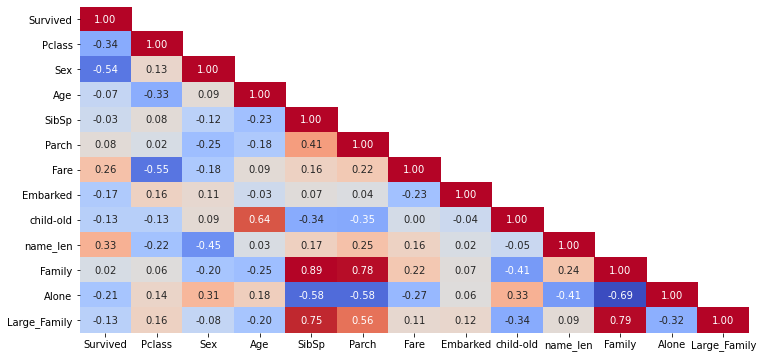

In [20]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix, mask=np.triu(matrix,1), annot=True,fmt=".2f", vmax=.8, cbar=False, cmap="coolwarm");

#### <span style="color:blue"> As you can see we got a larger correlation matrix and many features are correlated with each other<br> for example Familiy and SibSp because Family is the sum of SibSp and Parch <br> but I think so far it is not a problem.

#### <span style="color:blue">check performance of the model below and delete any feature if necessary.<br> Because sometimes we make more noise at such times when we have many features with high corelation.<br> As you know machine learning is an iterative process so let’s move on

#### <span style="color:green"> Now let's seperate the target feature

In [21]:
X_train = df_train.drop(columns=["Survived"])
Y_train = df_train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

#### <span style="color:green"> As I mentioned, we have an imbalanced data <br> so I will use SMOTE algorithm to fix this problem

In [22]:
sm = SMOTE()

X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

/home/raphael/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/raphael/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


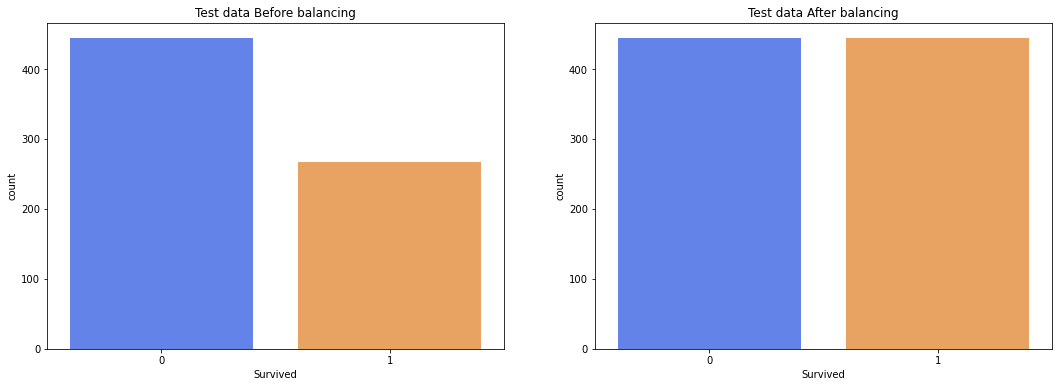

In [23]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(y_train,ax=ax[0],palette = 'bright',alpha=0.7,).set_title('Test data Before balancing')

sns.countplot(y_train_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Test data After balancing')

plt.show()

In [24]:
X_train = X_train_s
y_train = y_train_s

#### <span style="color:blue"> As you can see our data is balanced

# <span style="color:green"><div align="center">**Model** <a  name="5"></a>

# <span style="color:green"><div align="center">**Test Data** <a  name="6"></a>

# <span style="color:green"><div align="center">**Summary** <a  name="7"></a>